## K-fold sul tempo

In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tqdm import tqdm
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedKFold
import pydotplus

# Load the CSV file into a Pandas DataFrame
df = pd.read_excel('train.xlsx')

# Split the data into features (X) and target (y)
row_deleted = ['Nodes', 'Type']
X = df.drop(row_deleted, axis=1)
y = df['Type']
x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
 
scores = []
scores = cross_val_score(clf, X, y, cv = 5)

print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.87263455 0.8719184  0.87068142 0.86423611 0.86369358]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.869 +/- 0.004
****************************************************************************************************




In [2]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[49179,  2396,  1458],
       [ 2355,  7661,   747],
       [ 1331,   679,  3314]])

[[ 0.7194505  -0.42166711 -0.08012167 ... -0.30586138  0.07341726
   0.17347617]
 [ 0.34579748 -0.13715956 -0.32483266 ... -0.150495    0.2252599
   0.12835256]
 [ 0.35206641  0.09969176 -0.43601529 ... -0.08914219  0.22811878
   0.16068797]
 ...
 [-2.82475131 -0.84202602 -0.97582257 ...  0.13979538 -0.14587939
  -0.25618306]
 [-2.81767947 -0.8479065  -0.97806296 ...  0.14327171 -0.13505402
  -0.26439554]
 [-0.54927939  1.05690954 -0.76902048 ...  0.10058426 -0.26704983
  -0.28922813]]


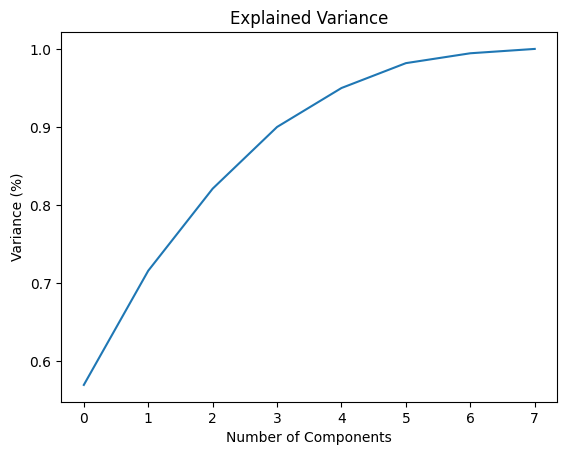

,PC-1,PC-2,PC-3,PC-4
0,0.719451,-0.421667,-0.080122,1.325385
1,0.345797,-0.137160,-0.324833,1.140456
2,0.352066,0.099692,-0.436015,1.044044
3,-0.680108,-0.671587,-0.282234,1.054890
4,-0.686961,-0.692361,-0.268231,1.062791
...,...,...,...,...
230395,-2.940909,-0.431650,-1.080574,0.179664
230396,-1.850558,0.388707,-0.992086,0.124686
230397,-2.824751,-0.842026,-0.975823,0.361639
230398,-2.817679,-0.847907,-0.978063,0.364883


In [3]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

# Feature selection using the Principal Components Analysis
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
print(principalComponents)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# The variance of 25% is reached using 4 features, so we keep only 4
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])
principal_x


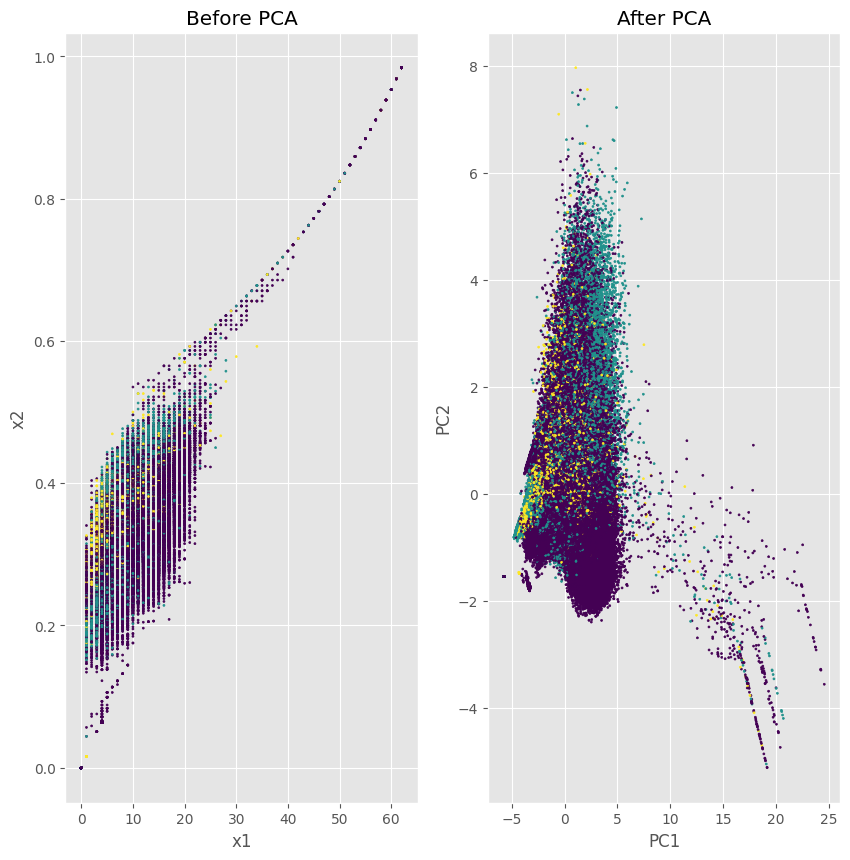

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(new_data[:,0], new_data[:,1], c=y, s=2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [8]:
x_train,x_test, y_train,  y_test = train_test_split(principal_x, y, test_size = 0.30, random_state=1)


scores = []
clf = tree.DecisionTreeClassifier(criterion='gini', random_state = 1)
scores = cross_val_score(clf, X, y, cv = 5)
clf.fit(x_train, y_train)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.87261285 0.87120226 0.86961806 0.86506076 0.86471354]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.869 +/- 0.003
****************************************************************************************************




In [9]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[46467,  3829,  2737],
       [ 3821,  6237,   705],
       [ 2512,   610,  2202]])

## K-fold per nodo

In [10]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tqdm import tqdm
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedKFold
import pydotplus


df = pd.read_excel('train_inorder.xlsx')
df = df.fillna(0)
# Split the data into features (X) and target (y)
row_deleted = ['Nodes', 'Type']
X = df.drop(row_deleted, axis=1)
y = df['Type']
x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
 
scores = []
scores = cross_val_score(clf, X, y, cv = 10)

print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.82947049 0.81015625 0.490625   0.4702691  0.67934028 0.72456597
 0.75290799 0.95503472 0.95516493 0.89457465]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.756 +/- 0.163
****************************************************************************************************




array([[49188,  2407,  1259],
       [ 2483,  7660,   718],
       [ 1524,   696,  3185]])

[[ 0.7194505  -0.42166711 -0.08012167 ... -0.30586138  0.07341726
   0.17347617]
 [ 0.21166539 -0.09965224 -0.4702786  ... -0.15453559  0.2450587
  -0.04927109]
 [ 1.20100627 -0.66332109 -0.06165796 ... -0.03258986  0.17887019
   0.07649913]
 ...
 [-1.95537632  1.01642754 -1.81615244 ...  0.79329057  0.28346239
  -0.2646443 ]
 [ 0.14307087  1.10604643  0.45636697 ...  0.40022403 -0.49734412
  -0.01620796]
 [-0.54927939  1.05690954 -0.76902048 ...  0.10058426 -0.26704983
  -0.28922813]]


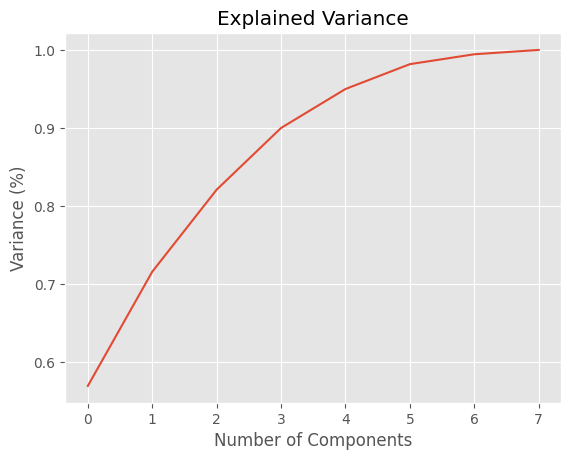

,PC-1,PC-2,PC-3,PC-4
0,0.719451,-0.421667,-0.080122,1.325385
1,0.211665,-0.099652,-0.470279,0.697482
2,1.201006,-0.663321,-0.061658,0.788156
3,1.008087,0.204338,-0.542148,0.658835
4,-0.705113,-0.290956,-0.338157,0.124049
...,...,...,...,...
230395,1.387494,2.848570,-1.484214,-0.548420
230396,-0.861586,1.246778,-0.303450,-0.053066
230397,-1.955376,1.016428,-1.816152,-1.054307
230398,0.143071,1.106046,0.456367,0.950807


In [11]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

# Feature selection using the Principal Components Analysis
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
print(principalComponents)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# The variance of 25% is reached using 4 features, so we keep only 4
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])
principal_x

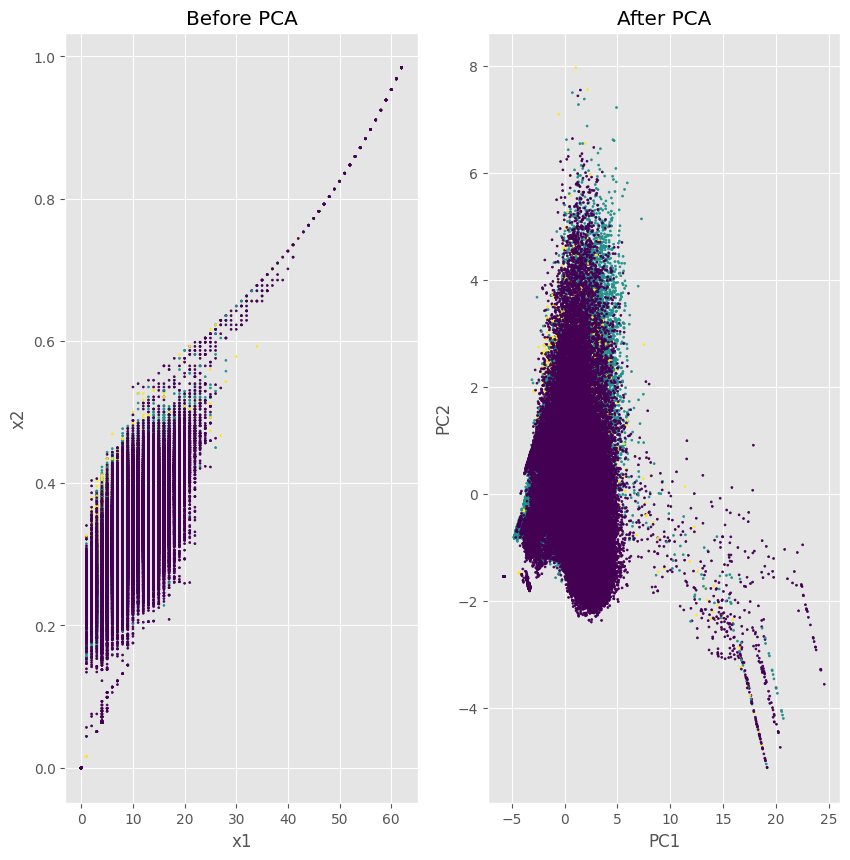

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(new_data[:,0], new_data[:,1], c=y, s=2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [13]:
x_train,x_test, y_train,  y_test = train_test_split(principal_x, y, test_size = 0.30, random_state=1)


scores = []
clf = tree.DecisionTreeClassifier(criterion='gini', random_state = 1, class_weight='balanced')
scores = cross_val_score(clf, X, y, cv = 10)
clf.fit(x_train, y_train)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.83012153 0.80881076 0.49448785 0.46701389 0.68111979 0.72482639
 0.74934896 0.95490451 0.95425347 0.89453125]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.756 +/- 0.163
****************************************************************************************************




In [14]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[46622,  3828,  2404],
       [ 4043,  6196,   622],
       [ 2597,   632,  2176]])